#### In this notebook we will explore what exactly goes into pricing a diamond and how much each aspect affects the price.

    Question 1: Does a certain shape of diamond cost more than another?
    Question 2: How much do the 4 C's affect the price of a diamond?
    Question 3: Is it possible to know if we're getting a good price?

The 4 C's — Carat (Weight), Cut, Clarity, and Color — are universally accepted standards for assessing the quality and value of a diamond. Here's how each factor generally affects the diamond's price:

1. **Carat (Weight)**: This is often considered the most influential factor because larger diamonds are rarer and therefore more valuable. Price increases exponentially with carat weight. For example, a 2-carat diamond will typically cost more than twice as much as a 1-carat diamond of similar quality.

2. **Cut**: This refers to how well a diamond has been cut and directly affects its brilliance and sparkle. A well-cut diamond will reflect light better, making it appear more brilliant and thus more valuable. Cuts are graded from poor to excellent. Poorly cut diamonds can be less expensive, as they don't have the same luster or fire as better-cut diamonds.

3. **Clarity**: Clarity grades assess how many blemishes or inclusions and their size, nature, and position. Diamonds with fewer inclusions are rarer and more valuable. Clarity is graded from Included (I1, I2, I3) to Flawless (FL). While high-clarity diamonds are pricier, many inclusions are microscopic and do not affect a diamond's appearance to the naked eye.

4. **Color**: Most diamonds range from colorless to light yellow. The less color a diamond exhibits, the higher the grade and the price, particularly for diamonds that are completely colorless (D-grade). Once a diamond reaches a certain level of color (typically around the K-L-M range), it can become less expensive, although diamonds with distinct colors (such as pink or blue) can be far more valuable.

The dataset contains the following columns:

- `Product_id`: A unique identifier for each diamond.
- `Shape`: The shape of the diamond (e.g., Emerald, Pear, Cushion, Princess).
- `Carat`: The weight of the diamond.
- `Clarity`: A measurement of how clear the diamond is.
- `Colour`: The color grade of the diamond.
- `Cut`: The quality of the cut of the diamond.
- `Polish`: The finish of the diamond's surface.
- `Symmetry`: The alignment of the diamond's facets.
- `Fluorescence`: The diamond's reaction to ultraviolet light.
- `Price`: The price of the diamond.
- `Product_url`: A URL for the product.


In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



In [538]:
# List of file names
files = ['data_cushion.csv', 'data_round.csv', 'data_heart.csv', 'data_emerald.csv', 'data_oval.csv',
         'data_marquise.csv', 'data_pear.csv', 'data_princess.csv']

dfs = []

#Read each file and appends its dataframe to the list
for file in files:
    df = pd.read_csv(f'scraped_data/{file}')
    dfs.append(df)

#Concatenate all dfs into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [539]:
# Display the basic dataset information
print (df.head())

#Display the data types and basic statistics of the dataset
print ('Info:', df.info())
print ('Stats summary: ',df.describe())
print ('Missing values:', df.isnull().sum())

  Product_id     Shape  Carat Clarity Colour  Cut Polish Symmetry  \
0    2106452   CUSHION   0.55     SI2      N   VG     EX       VG   
1    2042329   CUSHION   0.52     SI2    Y-Z   EX     EX       VG   
2    2055268   CUSHION   0.50     SI1      L   VG     EX       VG   
3    2128779   CUSHION   0.50     VS2      M   EX     EX       VG   
4    2103991   CUSHION   0.51     SI1      M   EX     EX       VG   

  Fluorescence     Measurements   Lab    Price  \
0            N   4.56-4.44×3.09   GIA  $673.61   
1            F   4.40-4.31×2.99   GIA  $735.67   
2            N   4.87-4.19×2.89   GIA  $768.14   
3            F   4.73-4.28×2.84   GIA  $770.64   
4            N   4.47-4.44×3.05   GIA  $784.13   

                                         Product_url  
0  https://capitalwholesalediamonds.com/product/0...  
1  https://capitalwholesalediamonds.com/product/0...  
2  https://capitalwholesalediamonds.com/product/0...  
3  https://capitalwholesalediamonds.com/product/0...  
4  https:

#### Dataaset Observations:
- The dataset contains 21,480 rows and 13 columns.
- Key columns relevant to diamond characteristics and pricing include: Shape, Carat, Clarity, Colour, Cut, Price.
- There are missing values in the Clarity, Cut, Polish, Symmetry, Measurements, and Lab columns.
- The Price column is stored as a string (probably because it includes a currency symbol), which we need to clean.

#### Data Cleaning
- Convert the Price column to a numeric format by removing currency and comma symbols.
- Handle missing values, especially in the Clarity and Cut columns, as these are critical for our analysis.
- Remove unnecessary columns that are not useful for the analysis.
- Remove outliers from Price Columnn

In [540]:
# Data Cleaning

# Remove the currency symbol from the 'Price' column and convert to numeric
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Strip leading/trailing spaces
df['Cut'] = df['Cut'].str.strip()
df['Clarity'] = df['Clarity'].str.strip()
df['Colour'] = df['Colour'].str.strip()

# Drop unnecessary columns that are not useful for the analysis
columns_to_drop = ['Product_id', 'Polish', 'Symmetry', 'Fluorescence', 'Measurements', 'Lab', 'Product_url']
df_cleaned = df.drop(columns=columns_to_drop)

# Handle missing values by dropping rows with missing data in 'Clarity' and 'Cut' columns
df_cleaned.dropna(subset=['Clarity', 'Cut'], inplace=True)

#Convert all Shape values to uppercase as some vlaues are in different cases
df_cleaned['Shape'] = df['Shape'].str.upper()

# Verify the cleaning process
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()

df_cleaned_info, df_cleaned_head


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21479
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Shape    20439 non-null  object 
 1   Carat    20439 non-null  float64
 2   Clarity  20439 non-null  object 
 3   Colour   20439 non-null  object 
 4   Cut      20439 non-null  object 
 5   Price    20439 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


(None,
       Shape  Carat Clarity Colour Cut   Price
 0   CUSHION   0.55     SI2      N  VG  673.61
 1   CUSHION   0.52     SI2    Y-Z  EX  735.67
 2   CUSHION   0.50     SI1      L  VG  768.14
 3   CUSHION   0.50     VS2      M  EX  770.64
 4   CUSHION   0.51     SI1      M  EX  784.13)

In [541]:
# Calculate Q1 and Q3
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned['Price'] < lower_bound) | (df_cleaned['Price'] > upper_bound)]

# Remove outliers
df_cleaned = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

# Report the number of outliers removed and remaining entries
print(f"Number of outliers removed: {len(outliers)}")
print(f"Number of entries after removal: {len(df_cleaned)}")


Number of outliers removed: 661
Number of entries after removal: 19778


#### Data Cleaning Summary:

- The Price column has been changed to a numeric format.
- Removed extra columns and kept only six important ones: Shape, Carat, Clarity, Colour, Cut, and Price.
- Rows with missing values in the critical Clarity and Cut columns have been dropped.
- Removed outliers based on the calculated bounds, leaving us with 19,778 entries.

#### **Question 1: Do different diamond shapes have different average prices?**
We will:
- Group the data by diamond shape and find the average price for each shape.
- Create a bar chart to show how the average price varies by diamond shape.

Shape
 MARQUISE    2552.340749
 HEART       2372.420010
 PEAR        2237.740989
 EMERALD     2233.245676
 PRINCESS    2098.234196
 OVAL        2091.236979
 CUSHION     1922.796243
 ROUND       1652.976627
Name: Price, dtype: float64


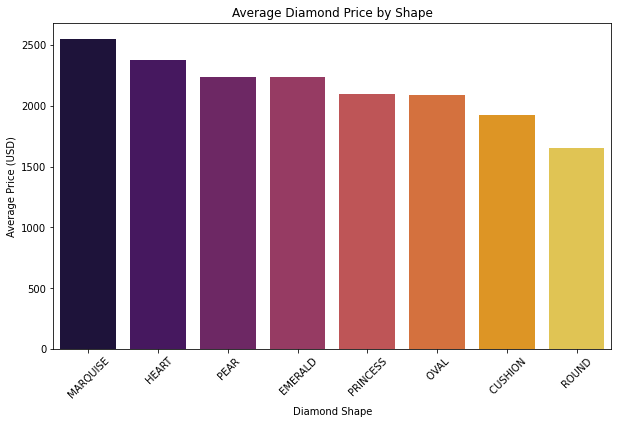

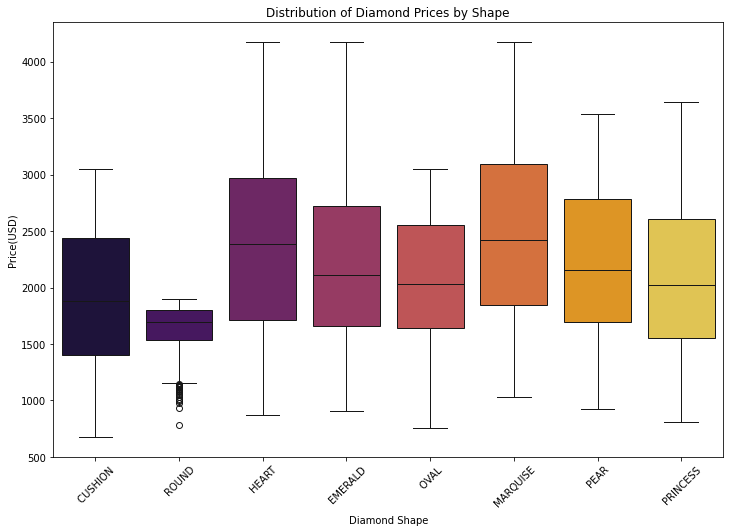

In [542]:
#Calculate avg price by shape
shape_price_avg = df_cleaned.groupby('Shape')['Price'].mean().sort_values(ascending=False)
print(shape_price_avg)

# Plot the average price by diamond shape
plt.figure(figsize=(10, 6))
sns.barplot(x=shape_price_avg.index, y=shape_price_avg.values, palette="inferno", hue=shape_price_avg.index)
plt.title('Average Diamond Price by Shape')
plt.xlabel('Diamond Shape')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

#Boxplot for price distribution to show distribution of prices within each shape
plt.figure(figsize=(12, 8))
sns.boxplot(x='Shape', y='Price', data=df_cleaned, palette="inferno", hue='Shape')
plt.title('Distribution of Diamond Prices by Shape')
plt.xlabel('Diamond Shape')
plt.ylabel('Price(USD)')
plt.xticks(rotation=45)
plt.show()

**Insights from the Bar Plot**:
- Marquise-shaped diamonds have the highest average price, indicating that they are generally more expensive than other shapes.
- Round and Cushion diamonds tend to have the lowest average prices, making them more affordable options compared to other shapes.

**Insights from the Box Plot**:
- Marquise diamonds not only have a higher median price but also show significant variability, with prices spread out over a wide range. This suggests that while Marquise diamonds can be expensive, there are also some that are priced lower.
- Heart and Emerald diamonds also exhibit a broad range of prices, meaning that they can be found at both lower and higher price points.

#### **Questin 2. Analysis of the Impact of the 4 Cs on Diamond Pricing**
In this analysis, we explore how each of the 4 Cs—Carat, Cut, Clarity, and Colour—affects the price of a diamond. The steps are as follows:

1. Carat vs. Price: Examining the influence of a diamond's weight on its price.
2. Cut vs. Price: Analyzing the effect of cut quality on pricing.
3. Clarity vs. Price: Investigating how clarity levels impact diamond prices.
4. Colour vs. Price: Exploring the relationship between color grading and price.
Combined Analysis: Using a regression model to assess the collective impact of the 4 Cs on diamond pricing.

Correlation between Carat and Price: 0.7120796049151757


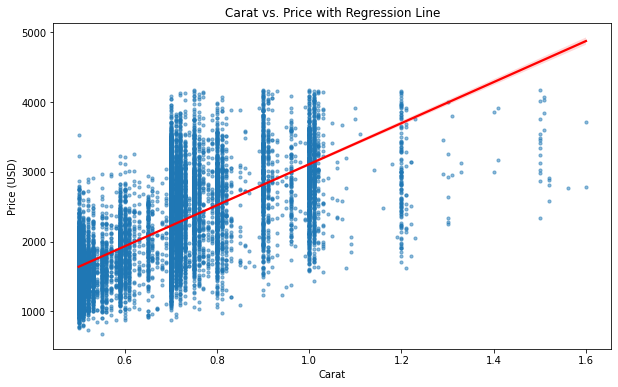

In [543]:
#Correlation between Carat and Price
correlation_carat_price = df_cleaned['Carat'].corr(df_cleaned['Price'])
print("Correlation between Carat and Price:", correlation_carat_price)

# Fit a regression line to better visualize the relationship between Carat and Price
plt.figure(figsize=(10, 6))
sns.regplot(x='Carat', y='Price', data=df_cleaned, scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red'})
plt.title('Carat vs. Price with Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()


 **Carat vs Price**
- There is a strong positive correlation (0.71) between carat and price, indicating that as the carat weight increases, the price of the diamond tends to rise significantly. This trend is visually confirmed by the upward slope of the regression line in the scatter plot, despite some variability and outliers.

     Cut        Price
0     EX  2122.530475
1     FG  2031.416312
2     VG  2007.230461
3     GD  1930.048589
4  IDEAL  1588.725000
5      F  1547.916667


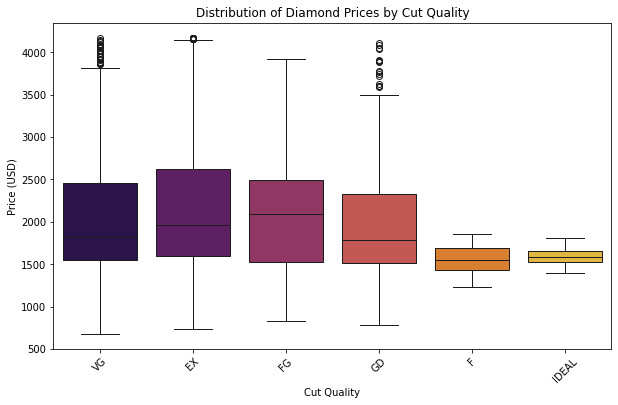

In [544]:
#Average price by Cut 
avg_price_by_cut = df_cleaned.groupby('Cut')['Price'].mean().sort_values(ascending=False).reset_index()
print(avg_price_by_cut)

#Boxplot of Price Distribution by Cut
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cut', y='Price', data=df_cleaned, palette="inferno", hue='Cut')
plt.title('Distribution of Diamond Prices by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()


**Cut vs. Price**
- **VG, EX, and FG cuts**  exhibit the highest average prices, each surpassing $2,000, which reflects their premium status in the diamond market.
- **IDEAL and F cuts** have noticeably lower average prices, around $1,500. This reduction is likely influenced by the exclusion of outliers, which may have led to a lower representation of higher-priced diamonds in these categories.
- The **price distribution** for VG, EX, and GD cuts is broader, indicating greater variability and a wider range of pricing within these cut qualities.

   Colour        Price
0       D  2268.953842
1       E  2240.360897
2       F  2225.035511
3       G  2168.777688
4       H  2092.551008
5       I  1993.678695
6     U-V  1956.165714
7   FANCY  1940.980705
8     W-X  1937.469091
9       N  1924.937857
10    S-T  1919.846087
11      J  1868.921368
12      L  1778.247240
13      K  1754.015856
14      M  1742.327357
15    O-P  1474.875000
16    Y-Z  1350.556364
17    Q-R  1166.950000


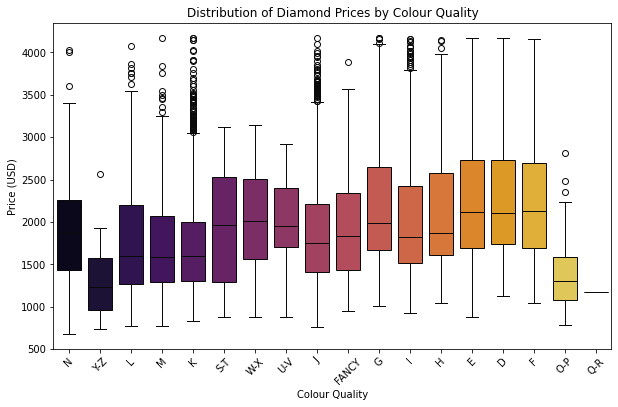

In [545]:
#Average price by Colour 
avg_price_by_colour = df_cleaned.groupby('Colour')['Price'].mean().sort_values(ascending=False).reset_index()
print(avg_price_by_colour)

#Boxplot of Price Distribution by Colour
plt.figure(figsize=(10, 6))
sns.boxplot(x='Colour', y='Price', data=df_cleaned, palette="inferno", hue='Colour')
plt.title('Distribution of Diamond Prices by Colour Quality')
plt.xlabel('Colour Quality')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

**Colour vs. Price**
- **Highest Average Prices**: Diamonds with color grades **D, E, and F** command the highest average prices, all above $2,200. These grades are near-colorless, which is highly desirable, reflecting their premium market value.
- **Price Gradient**: There is a noticeable price gradient as you move from near-colorless grades (D, E, F) to more colored diamonds like **N, M, O-P, Y-Z, and Q-R**. These lower color grades have significantly lower average prices, with **Q-R** being the least expensive at $1,166.95.
- **Wider Price Distribution**: The color grades **D, E, F, and G** not only have higher median prices but also exhibit broader price distributions, suggesting variability in the pricing, possibly due to differences in other quality factors like clarity and cut.

  Clarity        Price
0      FL  3768.655000
1      IF  2494.673574
2    VVS1  2153.789566
3    VVS2  2136.369099
4     SI2  2132.412672
5      I1  2128.957986
6     VS1  2097.097523
7     VS2  2050.493587
8     SI1  1987.553811
9      I2  1729.418000


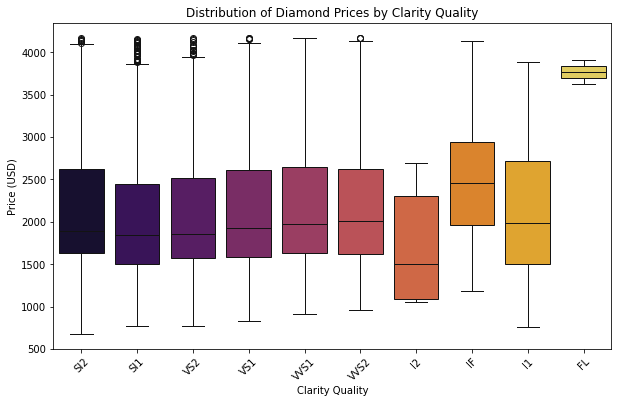

In [546]:
#Average price by Cut 
avg_price_by_clarity = df_cleaned.groupby('Clarity')['Price'].mean().sort_values(ascending=False).reset_index()
print(avg_price_by_clarity)

#Boxplot of Price Distribution by Clarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clarity', y='Price', data=df_cleaned, palette="inferno", hue='Clarity')
plt.title('Distribution of Diamond Prices by Clarity Quality')
plt.xlabel('Clarity Quality')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

**Clarity vs. Price**
- **Highest Average Prices**: The **FL (Flawless)** clarity grade has the highest average price at $3,768.66, significantly outperforming other clarity grades. This indicates that flawless diamonds, with no inclusions or blemishes visible under 10x magnification, are the most valuable.
- **Price Decrease with Increasing Inclusions**: As the clarity grade moves from **FL to I2** (which has noticeable inclusions), there is a general decline in average prices. For instance, diamonds with **I2** clarity have the lowest average price at $1,729.42. This trend highlights the impact of visible inclusions on diamond value.
- **Variability in Mid-Range Clarity Grades**: The mid-range clarity grades, such as **VVS1, VVS2, VS1, and VS2,** exhibit similar average prices ranging between $2,050 and $2,154. The price distribution within these grades is also narrower, suggesting that factors other than clarity might be influencing prices in this range, such as color and cut quality.

**Summary of findings**

- **Carat vs Price**: A strong positive correlation indicates that as carat weight increases, diamond prices rise significantly.
- **Cut vs Price**: Higher cut grades (**Ideal, Very Good**) lead to higher prices, though differences among the top cuts are subtle.

- **Color vs Price**: Better color grades (**D, E, F**) command higher prices, with prices decreasing as color quality declines.

- **Clarity vs Price**: **Flawless (FL)** diamonds are the most expensive, while diamonds with more inclusions (**I2, SI1, I1**) are priced lower.

Overall, carat weight and clarity have the most substantial impact on diamond prices.


#### Model Building and Analysis

In this section, we'll build a **Linear Regression** model to quantify the impact of the 4 Cs (Carat, Cut, Clarity, and Colour) on the price of diamonds. We’ll go through the following steps:

1. **Understand the relative importance of each of the 4 Cs** in determining the diamond price.
2. **Evaluate the model's performance** using metrics like R-squared and Mean Squared Error.
3. **Analyze the coefficients** to interpret how changes in each factor affect the price.
4. **Perform residual analysis** to check the model’s prediction errors.

This analysis will help us answer how much each of the 4 Cs contributes to the diamond price and whether we can predict the price effectively using these features.


In [547]:

# Define the order for each categorical column
cut_order = {'IDEAL': 1, 'EX': 2, 'VG': 3, 'GD': 4, 'FG': 5, 'F': 6}
clarity_order = {'FL': 1, 'IF': 2, 'VVS1': 3, 'VVS2': 4, 'VS1': 5, 'VS2': 6, 'SI1': 7, 'SI2': 8, 'I1': 9, 'I2': 10}
colour_order = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7, 'K': 8, 'L': 9, 'M': 10,
                'N': 11, 'O-P': 12, 'Q-R': 13, 'S-T': 14, 'U-V': 15, 'W-X': 16, 'Y-Z': 17, 'FANCY': 18}

df_encoded = df_cleaned.copy()

# Map categories to integers
df_encoded['Cut'] = df_encoded['Cut'].map(cut_order)
df_encoded['Clarity'] = df_encoded['Clarity'].map(clarity_order)
df_encoded['Colour'] = df_encoded['Colour'].map(colour_order)

# Apply LabelEncoder to ensure encoding compatibility (optional, as mapping already gives you the correct order)
label_encoder = LabelEncoder()

# Fit the encoder to each column (though not necessary since we've already mapped)
df_encoded['Cut'] = label_encoder.fit_transform(df_encoded['Cut'])
df_encoded['Clarity'] = label_encoder.fit_transform(df_encoded['Clarity'])
df_encoded['Colour'] = label_encoder.fit_transform(df_encoded['Colour'])

df_encoded.head(5)

,Shape,Carat,Clarity,Colour,Cut,Price
0,CUSHION,0.55,7,10,2,673.61
1,CUSHION,0.52,7,16,1,735.67
2,CUSHION,0.50,6,8,2,768.14
3,CUSHION,0.50,5,9,1,770.64
4,CUSHION,0.51,6,9,1,784.13


Mean Squared Error: 124302.83257731373
R-squared: 0.7254238235095113
   Feature  Coefficient
0    Carat  3477.192358
1      Cut   -57.331891
2   Colour  -100.368048
3  Clarity   -95.576432


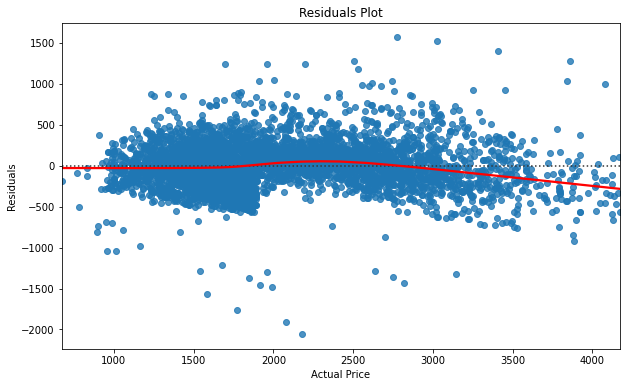

In [548]:
#Define the features
x= df_encoded[['Carat', 'Cut', 'Colour', 'Clarity']]
y = df_encoded['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#Create and train the model
model = LinearRegression()
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get the coefficients
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coefficients)

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=ytest, y=ypred, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()


### **Analysis for Question 3: Knowing if We're Getting a Good Price**